In [1]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
# STEP 2: Load the dataset
df = pd.read_csv("/content/tested.csv")

In [4]:
# STEP 3: Basic Info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)

Dataset Shape: (418, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Data Types:
PassengerId      int64
Survived  

In [5]:
# STEP 4: Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
# STEP 5: Handle Missing Data (Drop or Fill)
df_cleaned = df.copy()
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            df_cleaned[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df_cleaned[column].fillna(df[column].median(), inplace=True)

print("\nAfter cleaning missing values:")
print(df_cleaned.isnull().sum())


After cleaning missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


/tmp/ipython-input-6-1244421222.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[column].fillna(df[column].median(), inplace=True)
/tmp/ipython-input-6-1244421222.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [7]:
# STEP 6: Summary Statistics
print("\nSummary Statistics:")
print(df_cleaned.describe(include='all'))


Summary Statistics:
        PassengerId    Survived      Pclass                      Name   Sex  \
count    418.000000  418.000000  418.000000                       418   418   
unique          NaN         NaN         NaN                       418     2   
top             NaN         NaN         NaN  Peter, Master. Michael J  male   
freq            NaN         NaN         NaN                         1   266   
mean    1100.500000    0.363636    2.265550                       NaN   NaN   
std      120.810458    0.481622    0.841838                       NaN   NaN   
min      892.000000    0.000000    1.000000                       NaN   NaN   
25%      996.250000    0.000000    1.000000                       NaN   NaN   
50%     1100.500000    0.000000    3.000000                       NaN   NaN   
75%     1204.750000    1.000000    3.000000                       NaN   NaN   
max     1309.000000    1.000000    3.000000                       NaN   NaN   

               Age       SibSp

In [8]:
# STEP 7: Categorical and Numerical Features
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()
print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)



Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


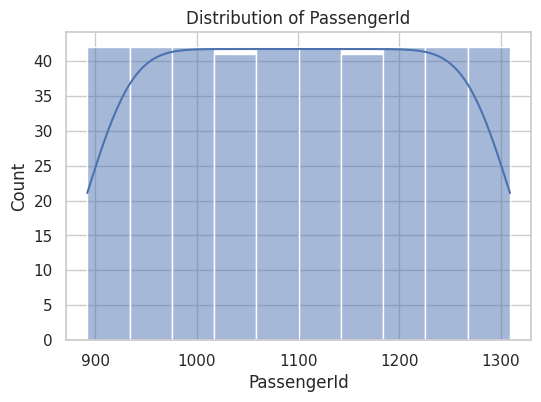

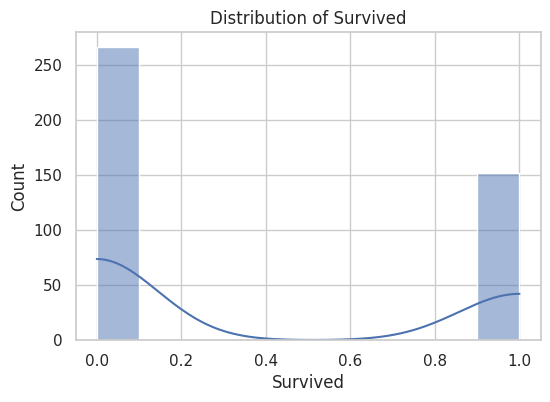

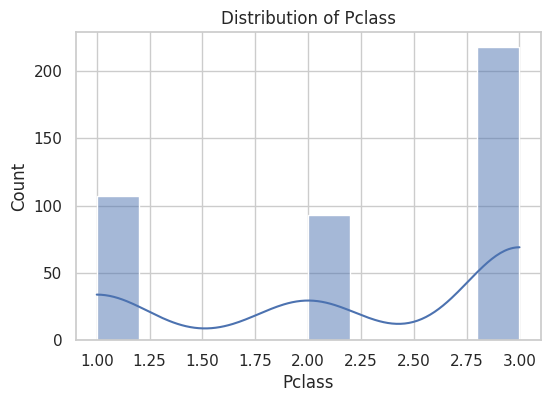

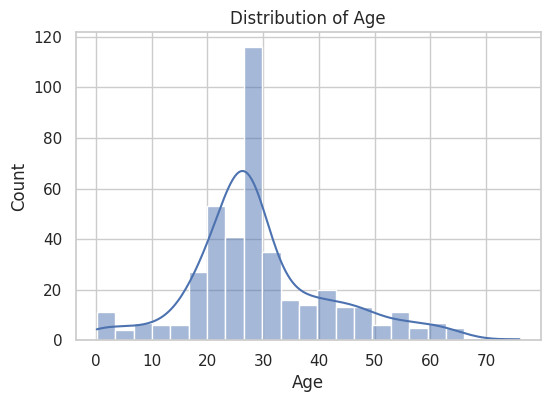

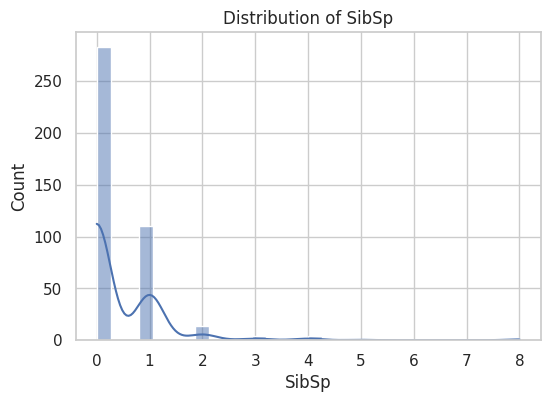

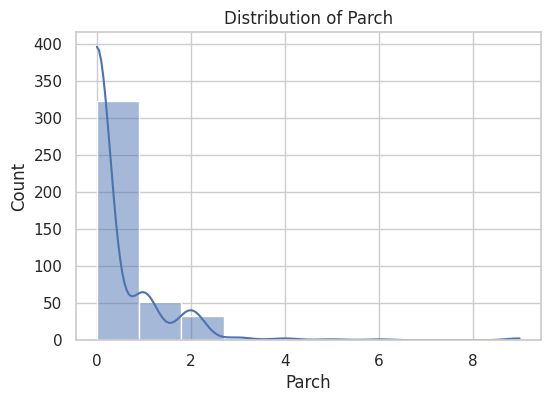

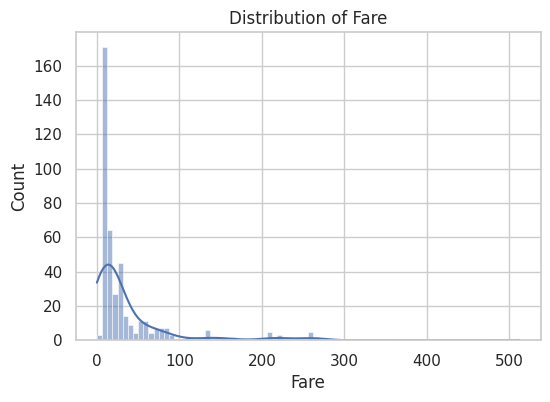

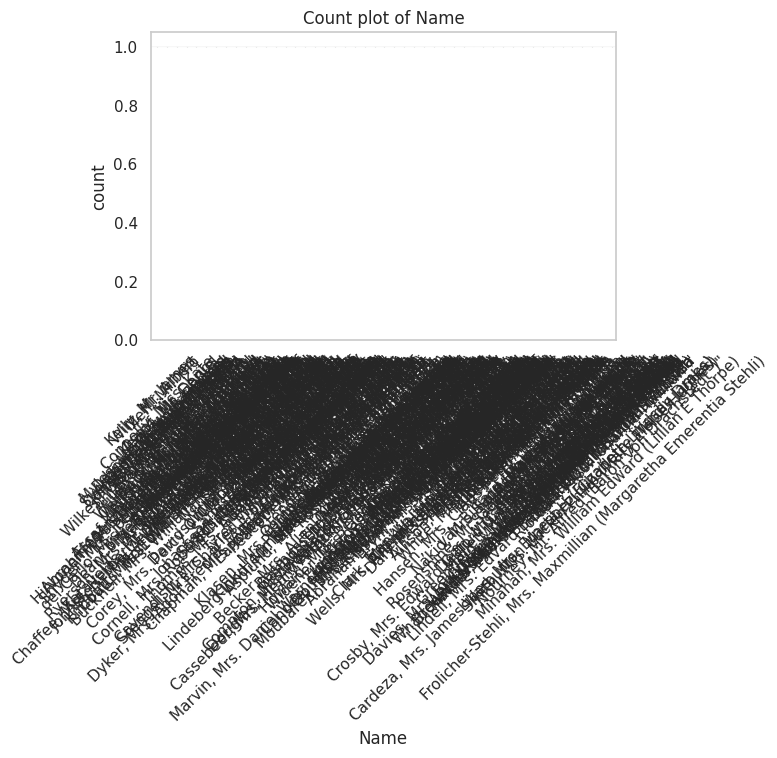

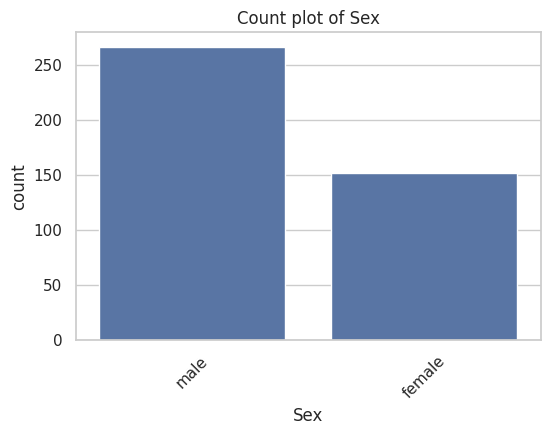

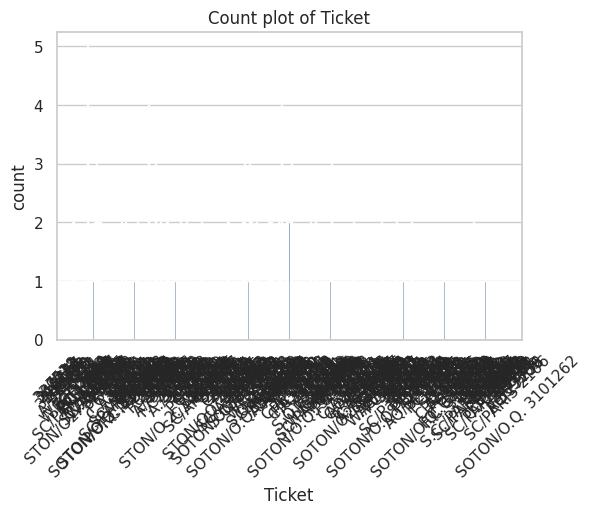

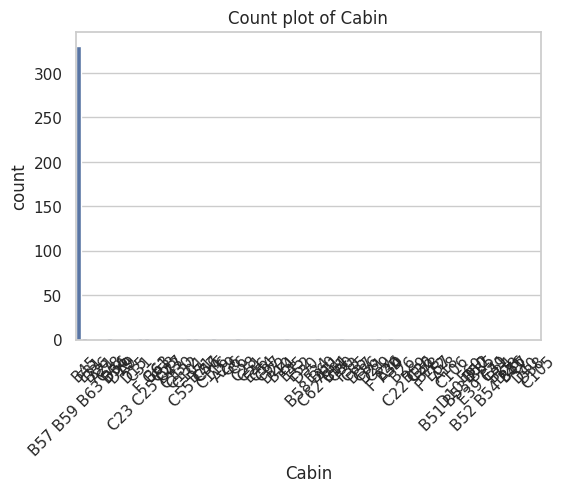

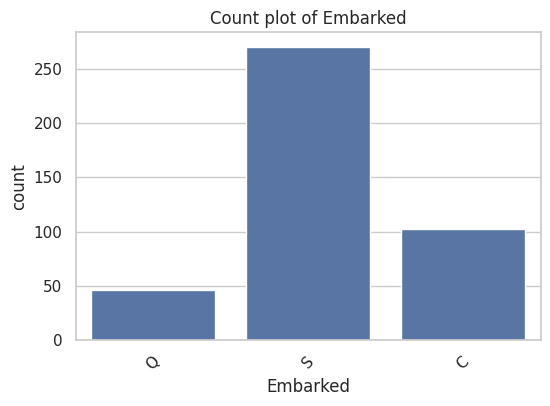

In [9]:
# STEP 8: Univariate Analysis
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_cleaned, x=col)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

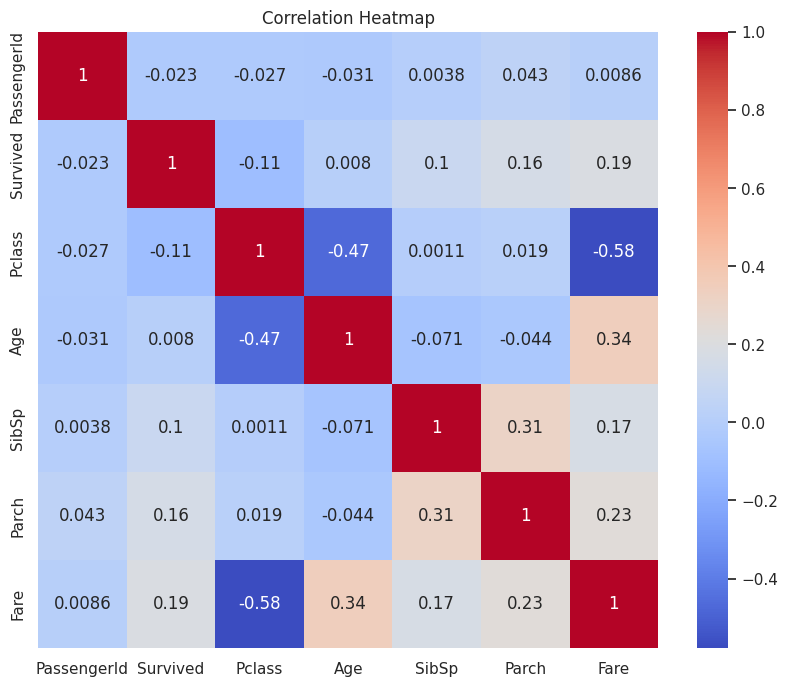

In [10]:
# STEP 9: Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

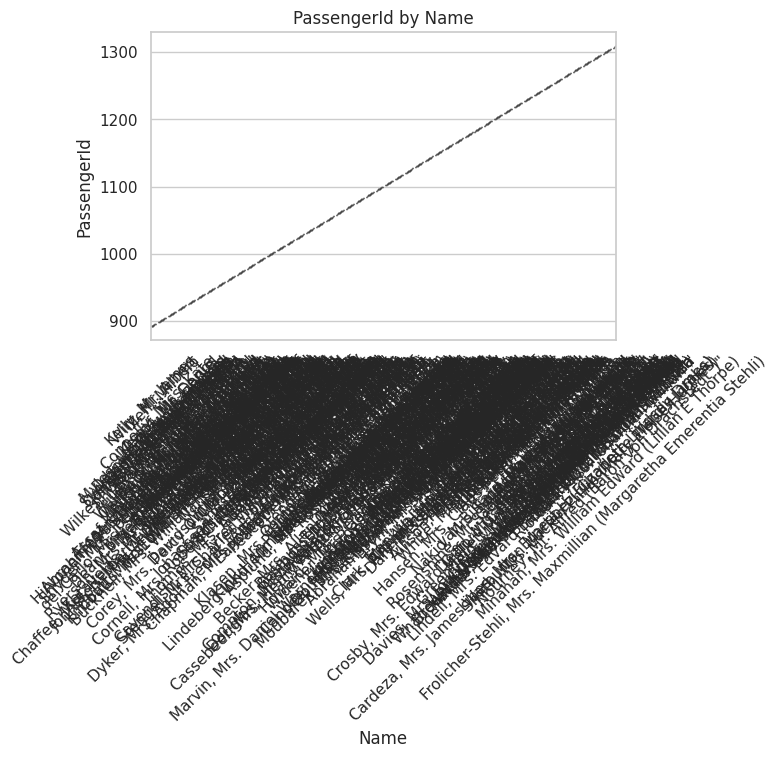

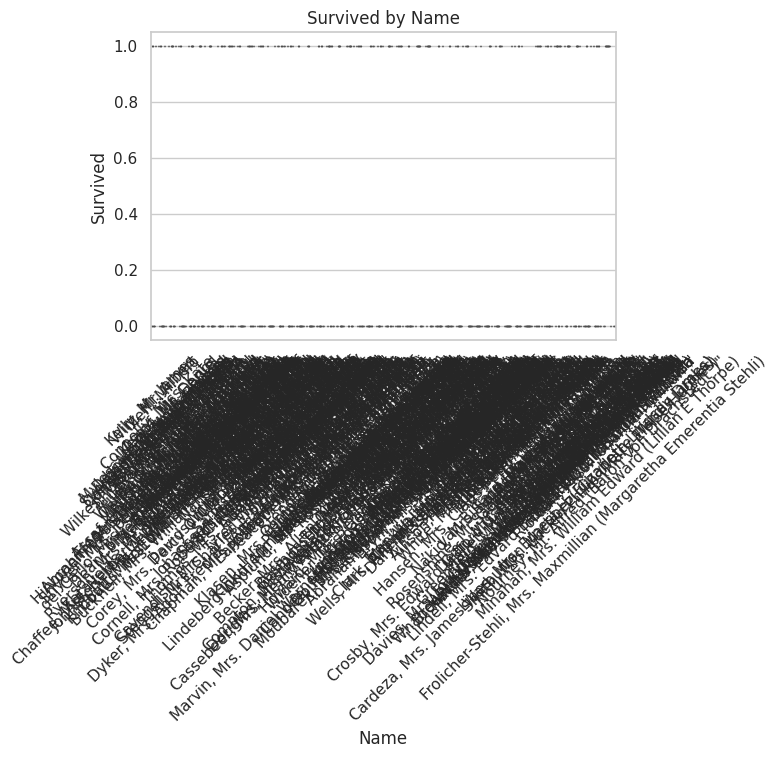

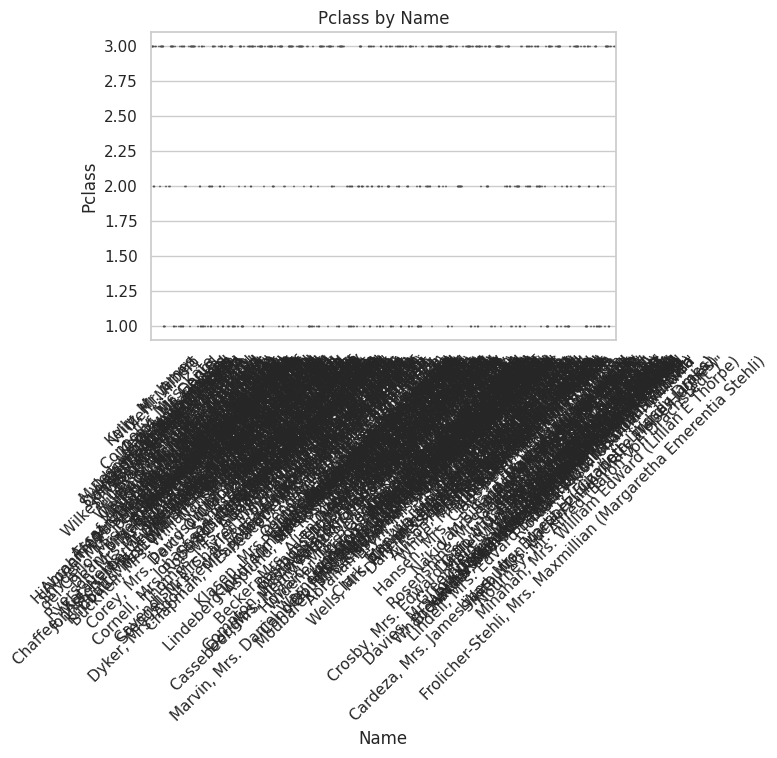

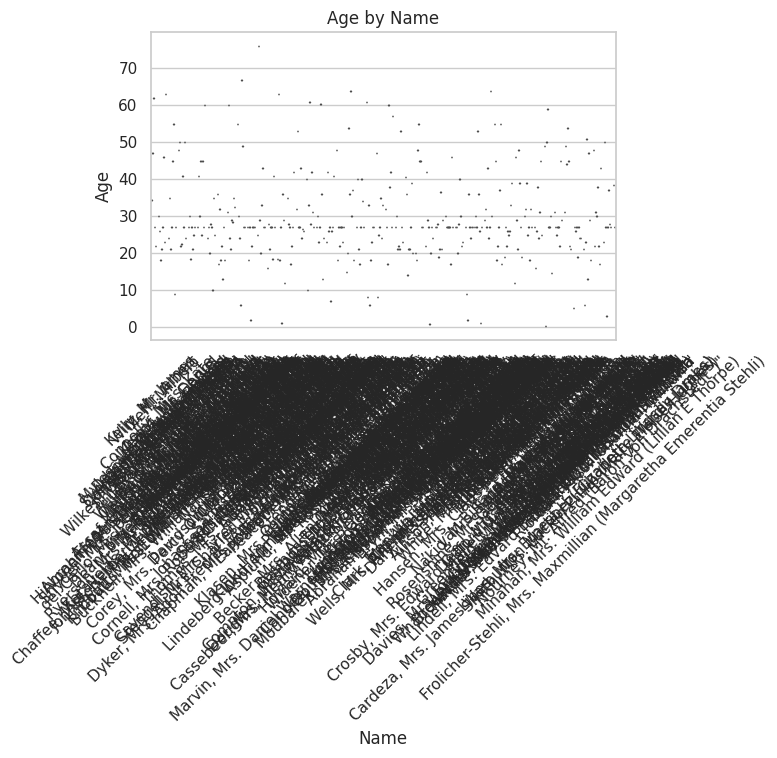

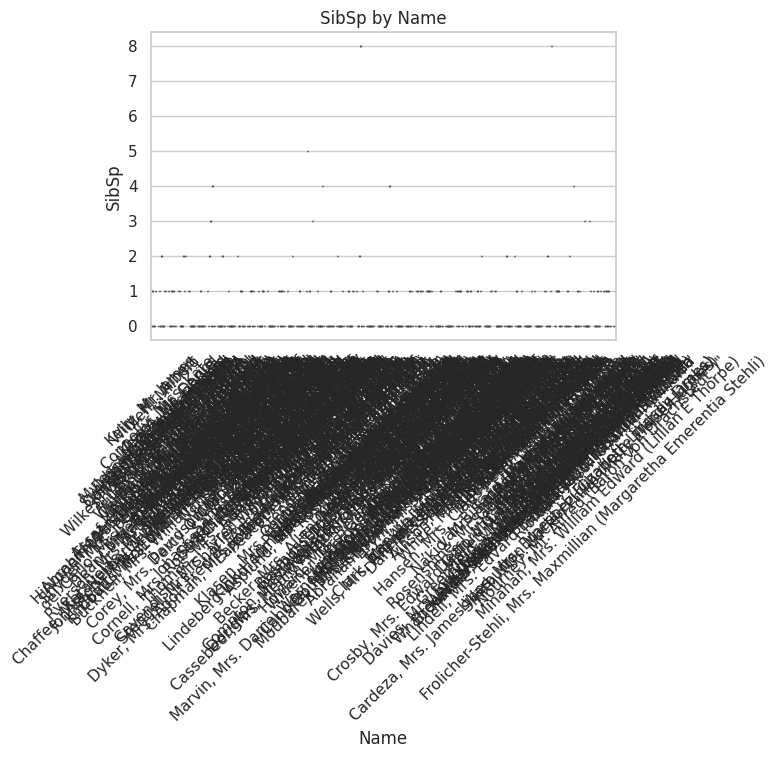

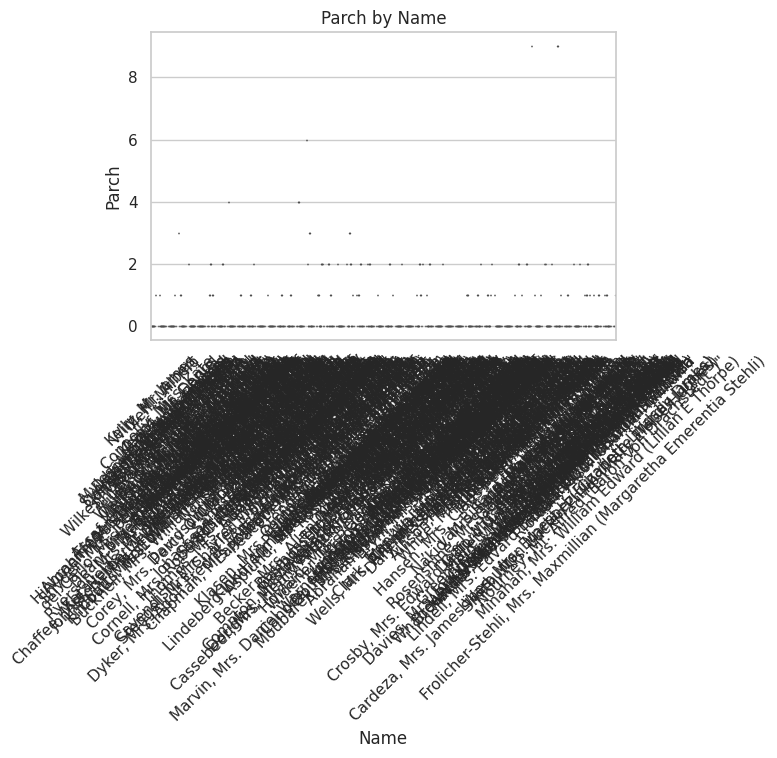

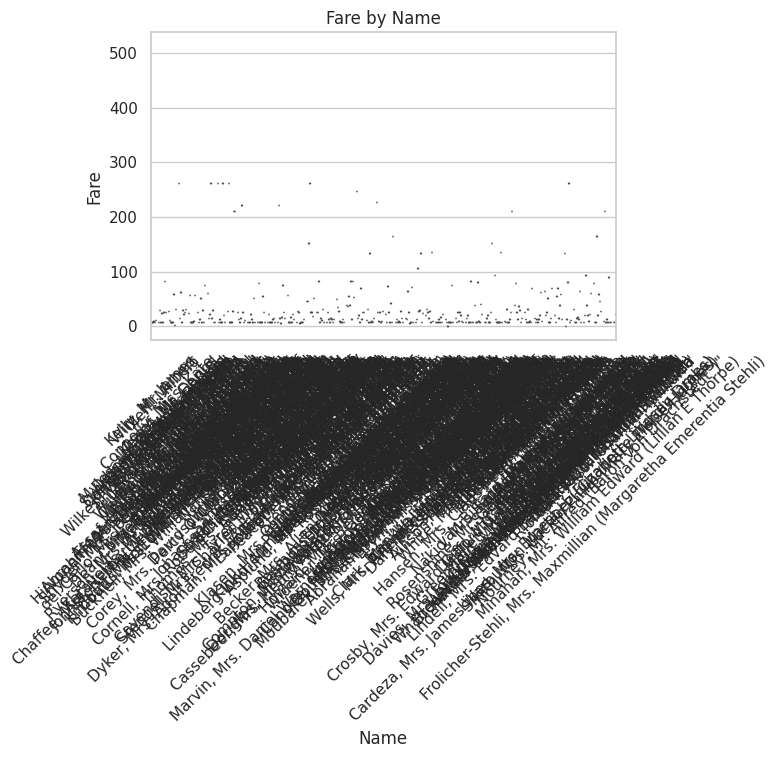

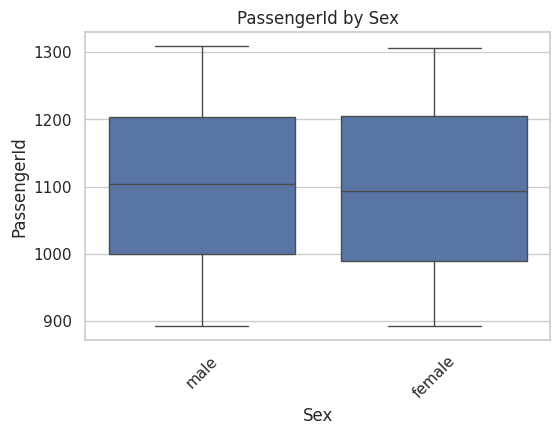

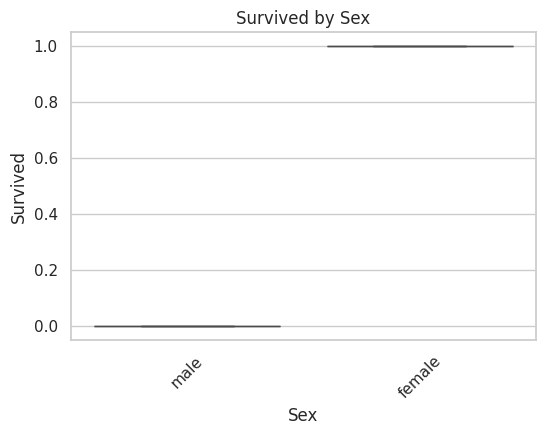

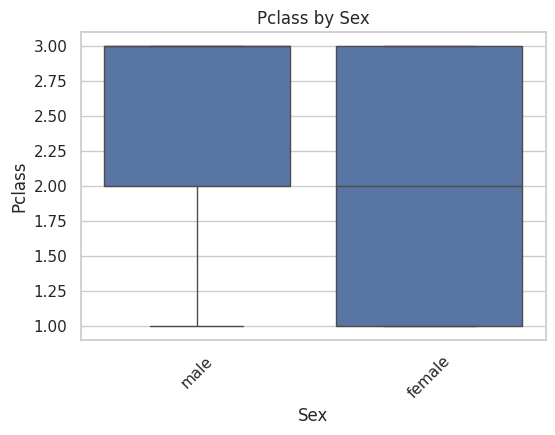

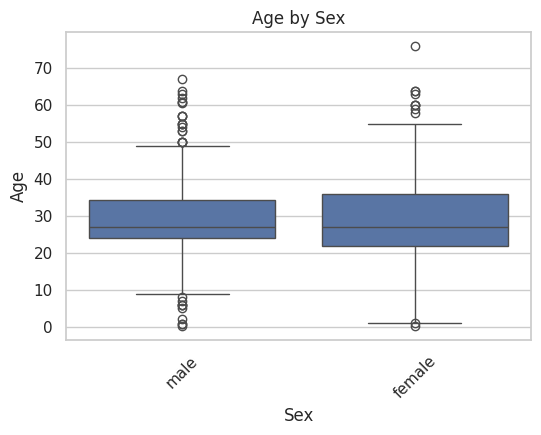

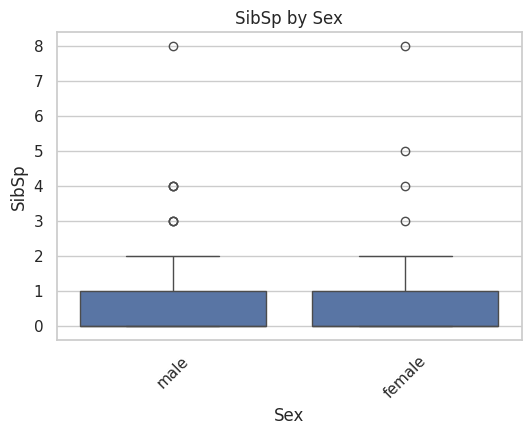

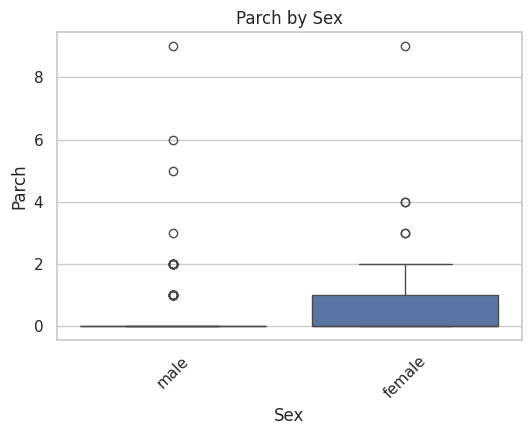

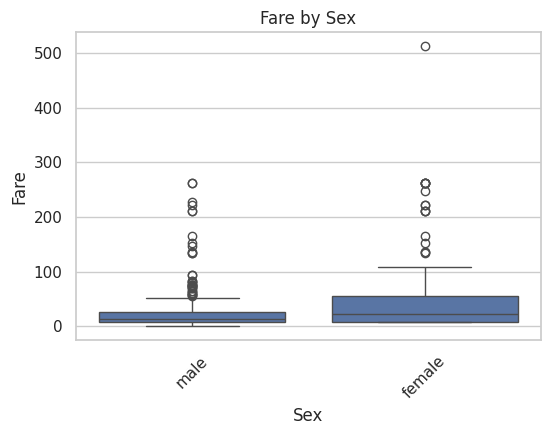

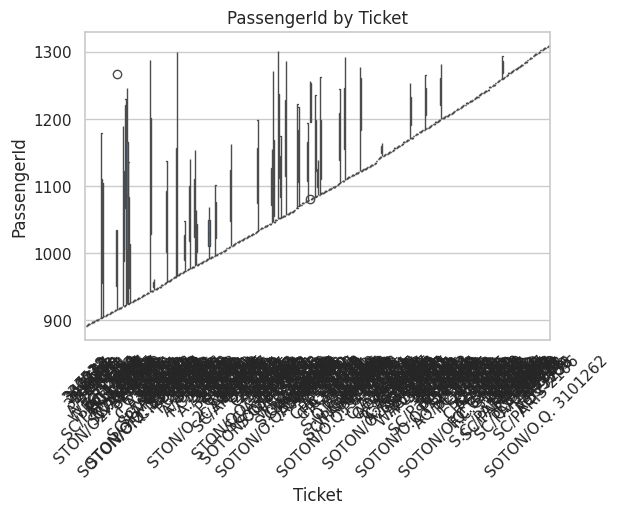

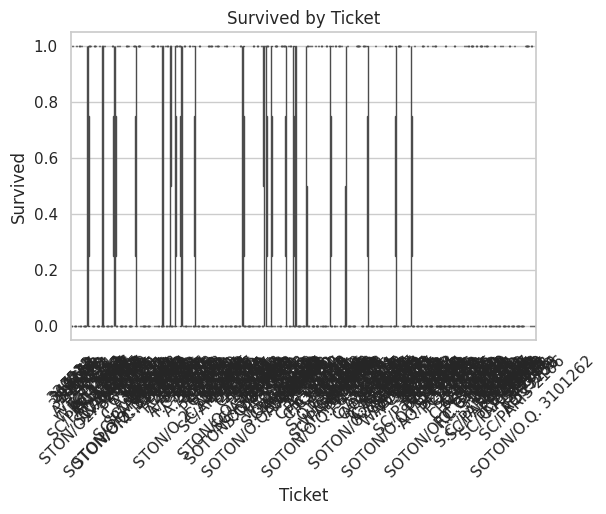

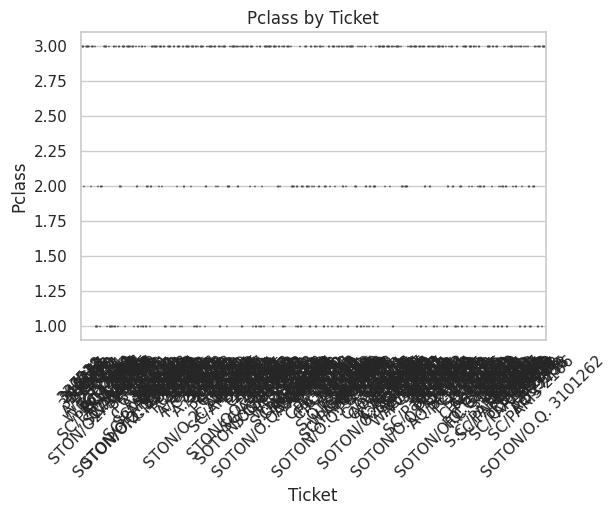

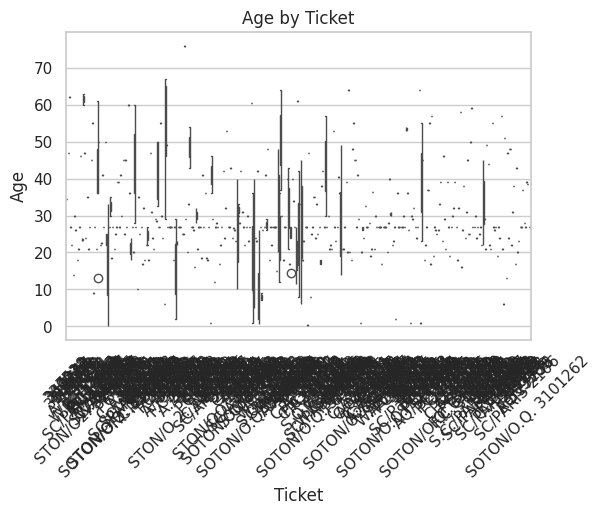

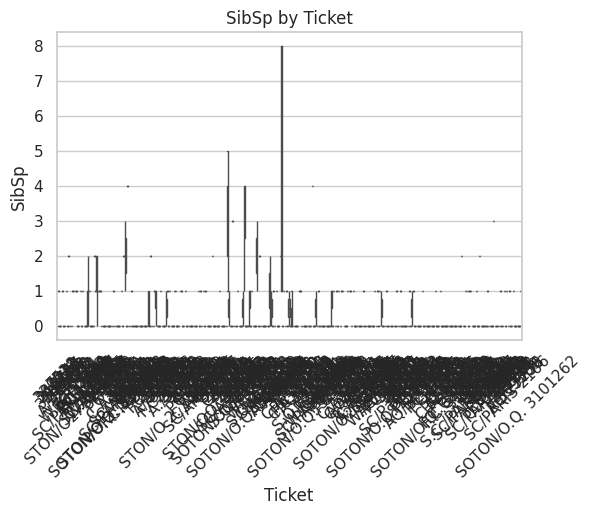

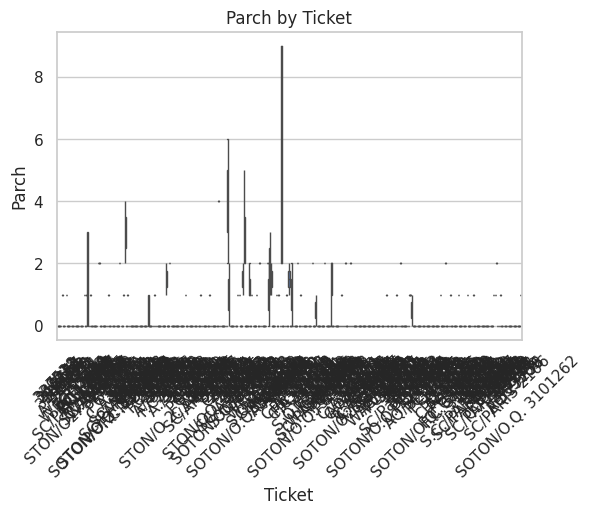

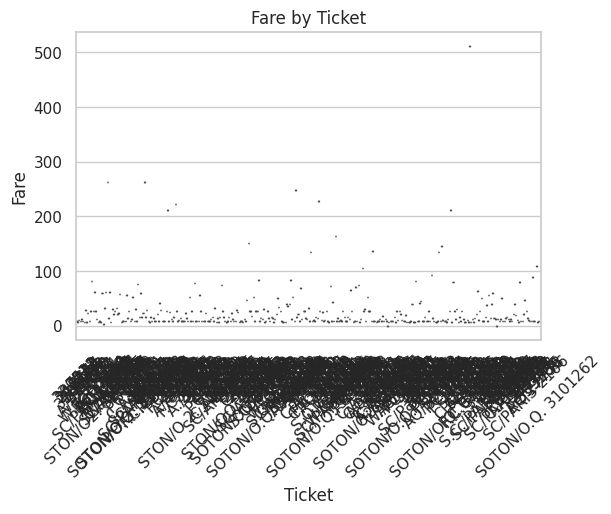

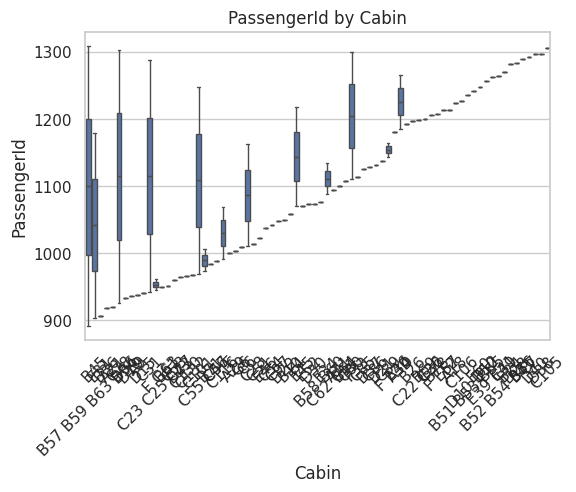

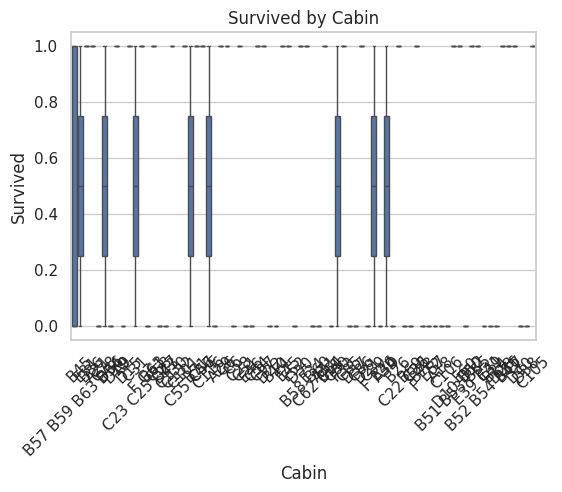

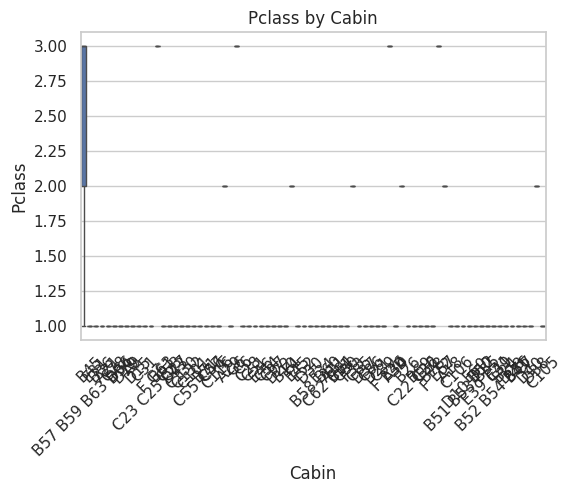

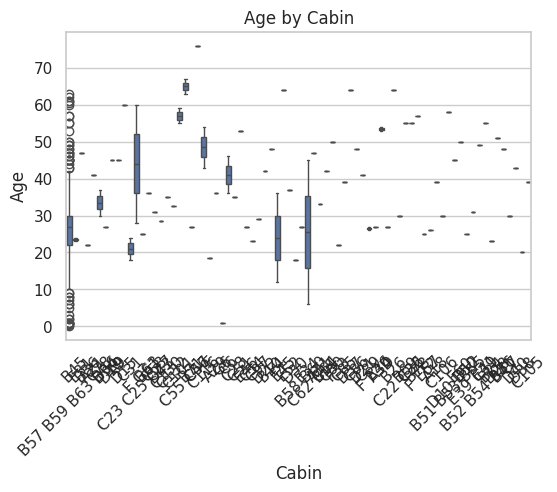

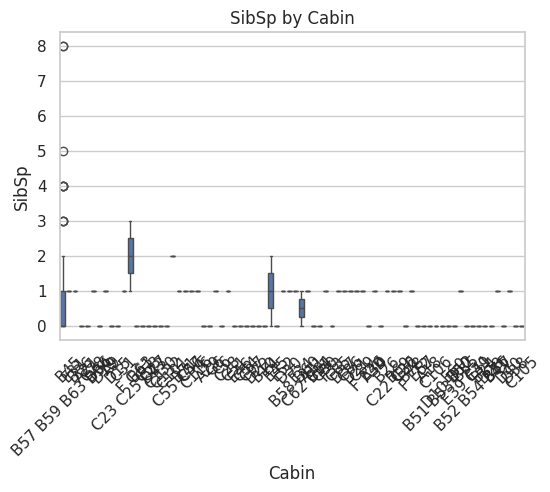

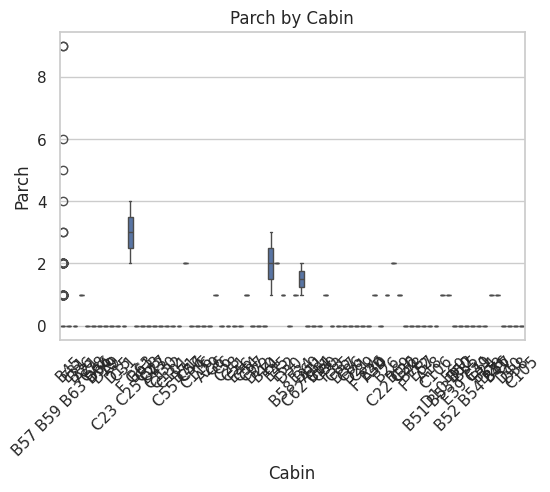

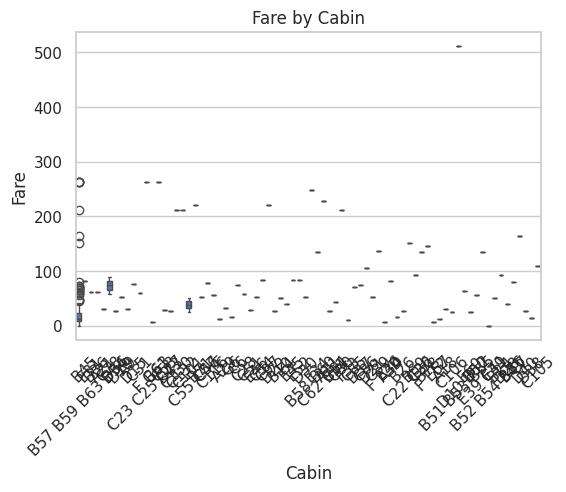

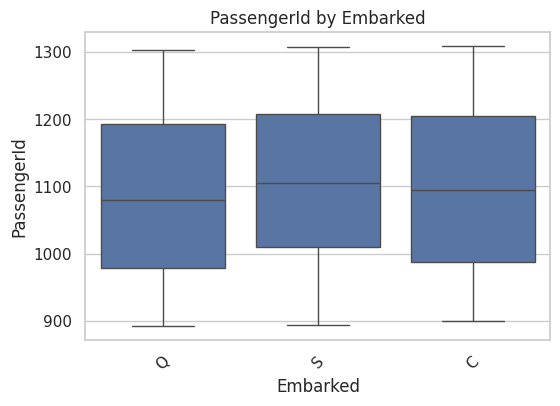

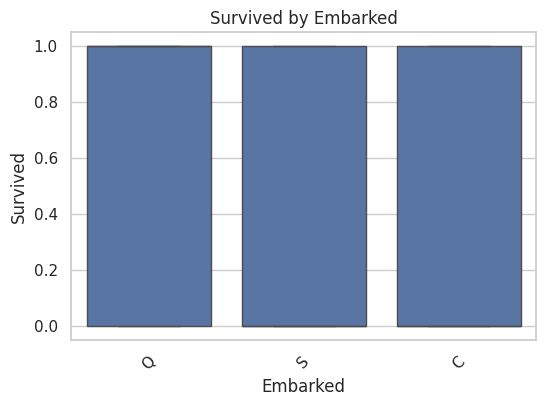

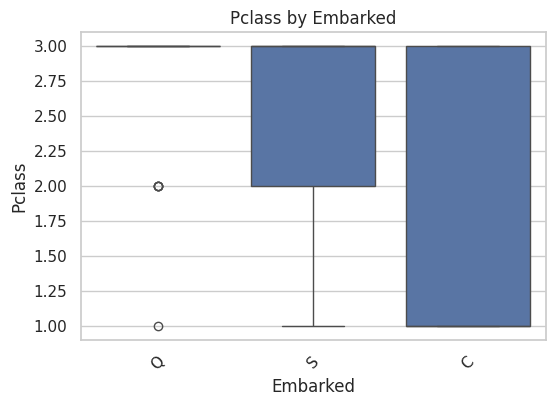

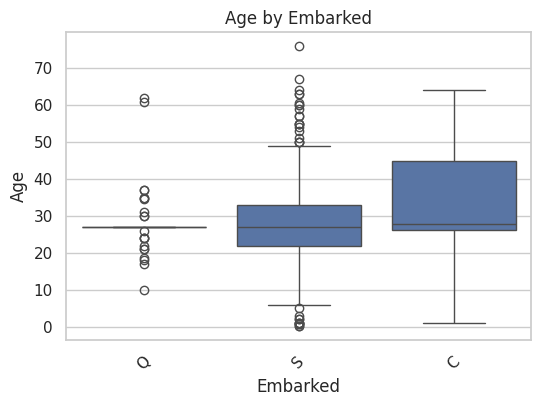

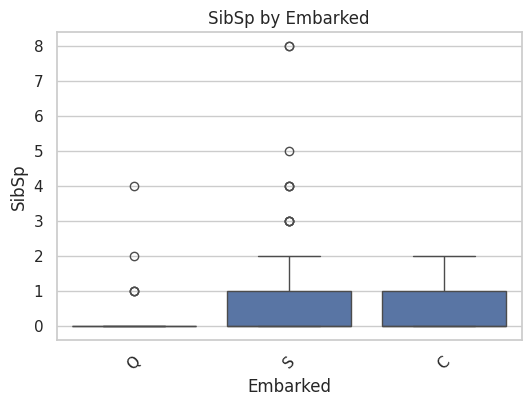

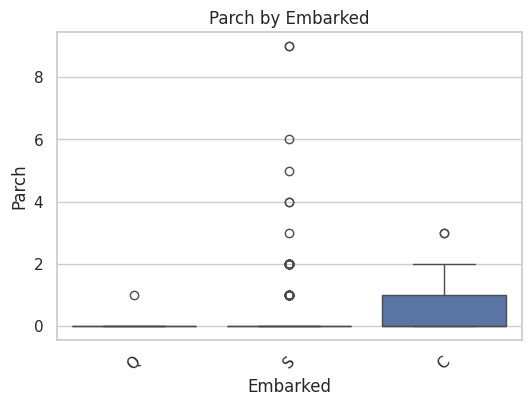

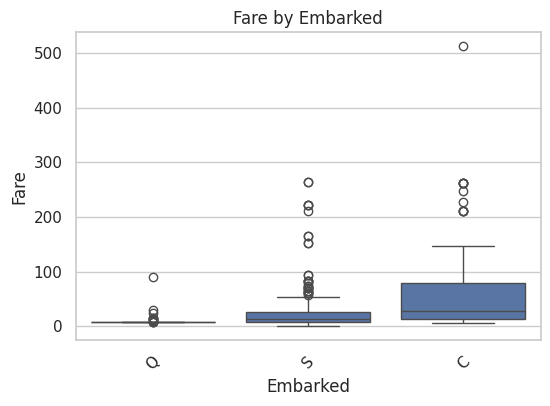

In [ ]:
# STEP 10: Bivariate Analysis (Categorical vs Numerical)
for cat in categorical_cols:
    for num in numerical_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df_cleaned[cat], y=df_cleaned[num])
        plt.title(f'{num} by {cat}')
        plt.xticks(rotation=45)
        plt.show()


In [ ]:
# STEP 11: Pair Plot
if len(numerical_cols) <= 6:
    sns.pairplot(df_cleaned[numerical_cols])
    plt.suptitle("Pair Plot", y=1.02)
    plt.show()

In [ ]:
# STEP 12: Print Final Cleaned DataFrame Shape
print("Final cleaned dataset shape:", df_cleaned.shape)

Final cleaned dataset shape: (418, 12)
